# Intro to TensorFlow

### Learning Objectives
- Overview of TensorFlow
- Graphs and Sessions
- Operations and Variables
- Using TensorBoard
- Models in TensorFlow
- Neural Networks in TensorFlow



![](https://www.tensorflow.org/_static/images/tensorflow/logo.png)

### What is TensorFlow
- In 2011, Google Brain built DistBelief, the precursor of TensorFlow, as a propreitart machine learning system specifically for deep learning neural networks. 
- DistBelief quickly gained in popularity, and after a few upgrades was renamed to TensorFlow.
- While DistBelief was very successful, it had some limitations. It was narrowly targeted to neural networks.
- Geoffrey Hinton, the team lead for the development of TensorFlow, implemented generalized backpropagation and other improvements which allowed generation of neural networks with substantially higher accuracy, for instance a 25% reduction in errors in speech recognition

![](https://pbs.twimg.com/media/C6k0JvBVwAEXJfZ.jpg)

### Why TensorFlow?
- Portability: deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API.
- TensorBoard (Which is awesome)
- TensorFlow was built from the ground up to be fast, portable, and ready for production service.
- Faster and more customizeable than Keras, but slightly more complicated.
- **TensorFlow is yours.**
    - TensorFlow is an open-sourced standalone library and associated tools, tutorials, and examples with the Apache 2.0 license so you’re free to use whenever.
    

![](https://mancap314.github.io/images/tensorflow.png)

# First - Build Phase: Build your tensor flow graph.
### -- A graph defines the computation. It doesn’t compute anything, it doesn’t hold any values, it just defines the operations that you specified in your code.

# Second - Execution Phase:  A Session to run all of your computations at once.
###    -- A session allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.

# What is a Tensor?
## An n-dimensional array
### - 0-d tensor: scalar (number)
### - 1-d tensor: vector
### - 2-d tensor: matrix

![](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/scalar-vector-matrix.gif)

## What do you think is going to happend when I run this cell?

In [1]:
import tensorflow as tf

a = tf.add(4, 6)

print(a)

Tensor("Add:0", shape=(), dtype=int32)


### ... Remember we first build the graph, then we execute in the session. 
### We simply just defined the tensor "a".



### What kind of tensor is "a"? Scalar, Vector, or Matrix?

![](http://www.chemometry.com/Images/Research/TAC/TAC1.gif)

## First we build our TensorFlow framework, then we execute them all at once. 

## In TensorFlow we initialize our "Execution Phase" by creating a session.


## We donote our session by calling "tf.Session()"

In [2]:
# How to get the value of a?
# Create a session, assign it to variable sess so we can call it later
# Within the session, evaluate the graph to fetch the value of a

a = tf.add(4, 6)
sess = tf.Session()

print(sess.run(a))

sess.close()

10


## Let's say we now have a lot more variables in our framework...

## Create a session to run and print operations a, b, and c.

In [3]:
a = tf.add(4, 6)
b = tf.multiply(2, 10)
c = tf.subtract(b, 5)

# Create your Session called sess by calling tf.Session()
# print a, b, c

## How many of you guys have used the "with" block before? 
**Hint: You may have seen it earlier in the course opening files before pandas.read_csv()**

Syntatically goes like this:

**with** `expression` **as** `variable`:

    variable (operation)
    
After the block is over the `expression` is terminated. 

In [4]:
# Now condense this a little bit

a = tf.add(4, 6)
b = tf.multiply(2, 10)
c = tf.subtract(b, 5)

with tf.Session() as sess:
    added = sess.run([a, b, c])
    print(added)


[10, 20, 15]


### A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

# What value will this print out?

In [5]:
x = 2
y = 3

op1 = tf.add(x, y)

op2 = tf.multiply(x, y)

op3 = tf.add(op2, op1)

with tf.Session() as sess: 
    
    op3 = sess.run(op3)

print(op3)


11


### What happened

![](assets/graph1.png)


# Why did I label one of these as `useless`?

In [6]:
x = 2
y = 3
add_op = tf.add(x, y)

mul_op = tf.multiply(x, y)

useless = tf.multiply(x, add_op)

add_op2 = tf.add(add_op, mul_op)

with tf.Session() as sess:
    
    z = sess.run(add_op2) 
    
print(z)


11


# What is happening here?

## Draw out what the Tensor Graph on your table with a partner.
- How will this graph look different?

![](assets/graph2.png)

![](assets/useless_nn.png)

# You can also run two parts of the graph in the same session simultaneously.

In [7]:
x = 2
y = 3
add_op = tf.add(x, y,)

mul_op = tf.multiply(x, y)

useless = tf.multiply(x, add_op)

pow_op = tf.pow(add_op, mul_op)

with tf.Session() as sess:
    
    z, not_useless = sess.run([pow_op, useless])
    
print(z)

print(not_useless)

15625
10


## How did I make my not useless variable not useless?

# Now let's add a few more peices to our graph. 

## First we will define the processor we would like to use for this Session. 
- **By doing so we are able to run multiple processes at once to cut down on compuation time.**

![](assets/gpus.png)

*Example: AlexNet Graph from the book “Hands-On Machine Learning with Scikit-Learn and TensorFlow”*

## All we need to do is specify which placeholder variables we would like to be run by which CPU/GPU device. 

In [8]:
# Creates a graph.

x = 2
y = 3
with tf.device('/cpu:1'):
    add_op = tf.add(x, y,)
    mul_op = tf.multiply(x, y)
    pow_op = tf.pow(add_op, mul_op)

with tf.device('/cpu:2'):
    useless = tf.multiply(x, add_op)


with tf.Session() as sess:
    
    
    # Creates a session with allow_soft_placement and log_device_placement set to True.
    sess = tf.Session(config=tf.ConfigProto(
          allow_soft_placement=True, log_device_placement=True))

    z, not_useless = sess.run([pow_op, useless])
    
print(z)

print(not_useless)



15625
10


#### Note:

**"allow_soft_placement=True"** = If you would like TensorFlow to automatically choose an existing and supported device to run the operations in case the specified one doesn't exist, you can set allow_soft_placement to True in the configuration option when creating the session.

Possible to break graphs into several
chunks and run them parallelly
across multiple CPUs, GPUs, or
devices

## What is your Graph?

- Consist of Two primary elements.

### 1.  Graph Structure
 - All your nodes and edges in the graph
 - How all of your operations are composed together

### 2. Graph Collections
 - All your global variables
 - All your training variables
 
**Biggest thing worth noting, is making sure your graph does not get too big. If your graph is too large it will really slow down your computer. This is easy to do in jupyter notebooks because every variable in the kernel is assigned to the default graph.**

### How to specify and call your graph

### tf.Graph()

In [9]:
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    a = 3
    b = 5
    x = tf.add(a, b)
    
sess = tf.Session(graph=g) # session is run on the graph g

print(sess.run(x))
# run session


8


# Now lets start visualizing our results on TensorBoard

# What is TensorBoard?
### - TensorBoard is a visualization tool to inspect and understand our TensorFlow runs and graphs. 
### - Training a massive deep neural network can be confusing and complicated to understand.
### - TensorBoard will make this a lot easier to understand, debug, and optimize our neural networks in TensorFlow.


![](assets/tboard.png)

# Let's build a graph together

In [10]:
import tensorflow as tf


a = 4

b = 6

x = tf.add(a, b)

with tf.Session() as sess:
    
    
    # add this line to use TensorBoard.
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    
    print(sess.run(x))
    
writer.close() # close the writer when you’re done using it

10


# Now go to your terminal window.

## Make sure you cd into `7.04-tensorflow`

### Enter this code into the command line:  
`tensorboard --logdir="./graphs" --port 6006`


### Then navigate to this url:
`http://0.0.0.0:6006`

## My graph was not labeled in TensorBoard. We always want labeled graphs in TensorBoard, it will make our lives a lot easier once the neural networks get bigger and we need to debug. 

### We can easily fix this by passing the name of every variable and operation in our graph. 

### We also need to convert our integers 2 and 3 to tensor objects so we can assign them a name

In [11]:

a = tf.constant(2, name='X')
b = tf.constant(3, name='Y')
add_op = tf.add(a, b, name='add')
with tf.Session() as sess:
    # add this line to use TensorBoard.
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(add_op))
    
writer.close() # close the writer when you’re done using it

5


## Refresh your TensorBoard webpage and take a look now at your labeled tensor graph. 

# Placeholders
### Remember Tensor Flow has 2 Phases 

#### 1. Assemble a graph
#### 2. Execute graph with Session

**This allows us to assemble the graph first without knowing the values needed for
computation**

# Analogy:
## Can define the function f(x, y) = x * 2 + y without knowing the values of x or y. 
- x, y are **placeholders** for the actual values.

## Why do we do this?
- We, or our clients, can later supply their own data when they need to execute the computation. 

**We will store our values in a dictionary until execution.**

# With someone next to you or by yourself explain what this cell is doing.
# What is this cell going to output? Why?

In [12]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])

# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)

# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)

with tf.Session() as sess:
# feed [1, 2, 3] to placeholder a via the dict {a: [1, 2, 3]}

# Remember: (tf.Session.run(fetch, feed_dict)
    print(sess.run(c, {a: [1, 2, 3]})) # the tensor a is the key, not the string ‘a’

[ 6.  7.  8.]


# Placeholders Shape is Important

### Code:
**var = tf.placeholder(tf.float32, shape=[])**

### Caveats:
- ** if shape=None** means that tensor of any shape will be accepted as value for placeholder.
- **if shape=None** is easy to construct graphs, but nightmarish for debugging

So... its best to include the shape. This will become way more clear once we start building neural networks.

Lastly, you can feed_dict any feedable tensor. Placeholder is just a way to indicate that something must be fed


# Variables 

## How is a variable different than a place holder?

## In the following equation what values would be "placeholders" and what values would be "variables"?

## y = w * x + b

In [13]:
# create placeholder tensors

x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

In [14]:
# create Variable tensors

w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

# Now we have added the placeholders and variables for a simple linear function. Next we want to run our session.


# BUT Wait...

# Before I run my sesssion, I need to make sure of one more thing. 

# All variables in TensorFlow must be initialized.


### The easiest way to initialize all of your variables, is to do it all at once right before you run your session.

In [15]:
import tensorflow as tf

a_list = [1, 2, 3, 4, 5]

x = tf.placeholder(tf.int32, shape=[5], name='x')

m = tf.Variable(1, name='m')

b = tf.Variable(1, name='b')

linear_func = tf.add(tf.multiply(x, m), b)

# Remember everything is run in the session, we are just define what we want to do here.
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    
    line = sess.run(linear_func, feed_dict={x: a_list})


    print(line)    

[2 3 4 5 6]


### There are a few other ways to initialize Variables, for more information I suggest you check the TensorFlow documentation. `tf.global_variables_initializer()` is by far the most common way to initialize your variables. 

# Now on your own or with a partner build the following:
1. One tensorflow placeholder
2. One tensorflow Variable
3. Build your feed_dict with 5 values
4. Add/Multiply (Or any operation) in your session and print out your results.

**Much like the example above**

In [16]:
# Build and run your tensor flow model






# Now we know most of the pieces, it is time to bring them all together. 

### Before we jump right into our first Neural Network lets, run through first building a linear model with TensorFlow. 

# Phase 1: Build our model graph

**Step 1: Import our packages and data**

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


data_file = 'assets/fire_theft.csv'

# Phase 1: Assemble the graph
# Step 1: read in data from the .csv file
data = pd.read_csv(data_file)

**Step 2: Define and name our place holders**

In [40]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32

X = tf.placeholder(tf.float32, name='X')

# WHAT IS OUR SECOND PLACE HOLDER?

Y = tf.placeholder(tf.float32, name='Y_actuals')

**Step 3: Define our Variables**
- What are our Variables?

In [41]:
# Step 3: create weight and bias, initialized to 0
# name your variables w and b

w = tf.Variable(0.0, name='weight')
b = tf.Variable(0.0, name='bias')

## Okay, before we move forward what are we trying to do with this linear regression?


**Step 4: Build our Model**

In [42]:
# Simple Linear Model

Y_predictions = X* w + b

# Y = X * w + b

# What is our loss?
**Hint: We will use mean squared error.**

**Step 5: Indicate our loss**
- Use TensorFlows function to take the square
- `tf.reduce_mean` gives us the mean of our squares

In [43]:
# Step 5: use the square error as the loss function
# Make all values positive
# find mean loss

squares = tf.square(Y - Y_predictions)

loss = tf.reduce_mean(squares, name='loss')

# How do we reduce our loss?
- What mathmatical function helps us reduce loss?

**Step 6: Build loss optimizer**
- We will use gradient descent right now but there are several different flavors of gradient descent that are sometimes better.

**More Optimizers**

tf.train.GradientDescentOptimizer

tf.train.AdagradOptimizer

tf.train.MomentumOptimizer

tf.train.AdamOptimizer

tf.train.ProximalGradientDescentOptimizer

tf.train.ProximalAdagradOptimizer

tf.train.RMSPropOptimizer

And more

In [44]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss

optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss=loss)

**Step 7: Specify our variable initializer**

In [45]:
# Step 7: initialize the necessary variables, in this case, w and b
init = tf.global_variables_initializer()

# Phase 2: Execute our model

**Step 8: Initialize our session using a with block**

In [46]:
with tf.Session() as sess:
    
    # Now that our session is initialized we need to run our initializer to initialize weights and biases
    sess.run(init)
    
    
    # STEP 9: Define our TensorBoard writer
    # we need to define our file location, we want it to be different than our last file location
    # we will also want to define the graph we would like to pass. This is the default location
    writer = tf.summary.FileWriter('./graphs/lin_reg', sess.graph)
    
    
    # STEP 10: Train our model using batches and a feed_dict
    for i in range(100):  # run 100 epochs
        total_loss = 0    # set our total_loss counter
        for x, y in data.values: # define our x and y data from our data set we will assign these to our feed_dict
            
            # Session runs optimizer to minimize loss and fetch the value of loss. Name the received value as l
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            
            # Why do I have a "_" value?
            
            # Increase our total_loss by "1" (*This is not a one*)
            total_loss += l
        
        # Print out our total_loss at each Epoch
        print("Epoch {0}: {1}".format(i, total_loss / len(data)))
        
    # close the writer when you're done using it
    writer.close()
    
    # Lastly we want to run our values for weight and bias, so we can plot them afterwards.
    w, b = sess.run([w, b])
        
        
            

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

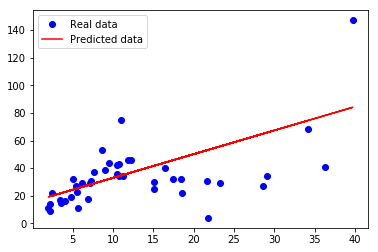

In [47]:
# plot the results
X, Y = data['X'], data['Y']
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

# What was my batch size? 

In [ ]:
# The length of our data, so essentially there was not one. 

### Let's look at our linear model in TensorBoard

### Now go to your terminal window.

### Enter this code into the command line.  `tensorboard --logdir="./graphs/lin_reg" --port 6006`


### Then navigate to this url. `http://0.0.0.0:6006`



# Any Questions?

## Now we have grasp of how to build a simple linear model in TensorFlow, we are going to stack all of these skills together to build our first neural network with TensorFlow. 

## I am going to run through this neural network example using the same process as before, but with only a couple more steps 

# Phase 1: Build our graph

**Step 1: Import our packages and data**

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_Data', one_hot=True)

In [ ]:
mnist.train.images[0]

In [ ]:
mnist.train.labels[0].shape

In [ ]:
mnist.train.images[0].shape

### These are the shapes of our values in training data. What does this tell us? 

**Step 2: Define our Neural Network Constants**

In [ ]:
# These are the number of nodes we want to have in each layer,
# we can set these values to whatever we want.
num_nodes_hl1 = 500
num_nodes_hl2 = 500
num_nodes_hl3 = 500

# Number of output classes equals 10
# Our classes are also in one hot encoding
n_classes = 10

# The size of our imput data is 784
input_dim = 784

# We can set our batch size to whatever we can fit into memory
batch_size = 64

# Determine how many epochs we would like to use
hm_epoch = 10

**Step 3: Define our placeholders**

In [ ]:
# Set the height and wide of model
# These are x and y variables and they must be one dimensional each
# So the first dimension always equals None
# The second must equal the dimension of your X and y variable

x = tf.placeholder(tf.float32, shape=[None, input_dim], name='x_placeholder')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='y_placeholder')

**Step 4: Define our variables**
- This step will look a bit different now that we are working with a neural network

Before we just needed to define two variables our bias and our weights. However, now we have a bias and weight for every node on each layer. 

We need to build a dictionary of weights and biases at every layer with the correct shape to make sure we have a weight for every node. 

In [ ]:
# Initialize hidden layer's variables (Inputs, Weights, and Biases) and take random sample from batch training data

# Shape equals input data, and number of nodes
hidden_layer_1 = {'weights': tf.Variable(tf.random_normal(shape=[input_dim, num_nodes_hl1], name='hidden_layer_1')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl1]))}

# The output shape of hidden_layer_1 is the num_nodes_hl1, so that is the input for the next layer
hidden_layer_2 = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl1, num_nodes_hl2], name='hidden_layer_2')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl2]))}


hidden_layer_3 = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl2, num_nodes_hl3], name='hidden_layer_3')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl3]))}


# Lastly we need the output layer, which must have the same output shape as our number of classes or our y shape
output_layer = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl3, n_classes], name='output_layer')),
                  'biases': tf.Variable(tf.random_normal(shape=[n_classes]))}

### There is a lot going on here. Let's break it down a little bit. 

- First I initialize my variable much like I did in the linear regression.
- Second I need to assign these variables a starting value, the starting value does not really matter that much because it is going to change as my model learns. So I use `tf.random_normal()` to generate random values for my variables to start at. 
- The most important thing to noice is the shape of my variables. They are the same shape as my input to that layer and my output for that layer. I start with my X data input dimensions, and end with my target variables output dimension. 


![](https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg?width=600)

**Step 5: Build our model**

Again this step is very similar to the linear model we built (Y = X * w + b), but it is going to be slightly different much like the last step. We need to account for layers sizes and weights and biases at each node. 

In [ ]:
# Build models function  (input * weights) + biases
# input = data
# weights = hidden_layer_n['weights']
# biases = hidden_layer_n['biases']

l1 = tf.add(tf.matmul(x, hidden_layer_1['weights']), hidden_layer_1['biases'])

# Add activation function to run this data
l1 = tf.nn.relu(l1, name='relu_l1')

l2 = tf.add(tf.matmul(l1, hidden_layer_2['weights']), hidden_layer_2['biases'])
l2 = tf.nn.relu(l2, name='relu_l2')

l3 = tf.add(tf.matmul(l2, hidden_layer_3['weights']), hidden_layer_3['biases'])
l3 = tf.nn.relu(l3, name='relu_l3')

y_predicted = tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])

This is the same Y = x * w + b, but we need to do matrix multiplication instead of normal multiplication because our weights are matrices, then we use the relu function to help us make our predictions. The layer values trickle down towards the bottom until they finally get to our output layer with our final prediction.

**Step 6: Define our loss**

In [ ]:
# The same reduce mean function but we also use softmax, a mulitinomial logistical classifier.

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y, name='loss'))

### If we have time I will go over this in class, if not, then I will slack out an info doc I wrote up explaining how softmax cross entropy works. 

**Step 7: Build our optimizer**

In [ ]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss, name='optimizer')

This is very similar to gradient descent as an optimizer just a different flavor. 

**Step 8: Initialize all of our variables**

In [ ]:
# Initialize all global variables
init = tf.global_variables_initializer()

# Phase 2: Execute our model

**Step 9: Initialize our session using a with block**

In [ ]:
# Activate our sessions and repeat over for loop
with tf.Session() as sess:

    # compile all the tf assigned variables (tf.Variables)
    sess.run(init)

    # Initialize our TensorBoard writer for our NN
    writer = tf.summary.FileWriter('./graphs/nn', sess.graph)

    # Loop over the defined number of epochs
    for epoch in range(hm_epoch):
        # initialize loss at 0
        total_loss = 0

        # Initialize for loop for batches
        for _ in range(int(mnist.train.num_examples/batch_size)):

            # Tensor flow's mnist next batch function breaks your training data up for you based on your batch size
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)

            # we use _ because it returns a tuple where the first value is always none, so we dont care about it
            _, l = sess.run([optimizer, loss], feed_dict= {x: epoch_x, y: epoch_y})

            # add loss to epoch loss
            total_loss += l

        # Print out our total_loss at each Epoch
        print('Epoch ', epoch, ' completed out of ', hm_epoch, ', loss: ', total_loss)
        
    # close the writer when you're done using it
    writer.close()


    # Determine the correct amount of classifications
    correct = tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy ', accuracy.eval({x:mnist.test.images, y: mnist.test.labels}))

### Let's look at our linear model in TensorBoard

### Now go to your terminal window.

### Enter this code into the command line.  
`tensorboard --logdir="./graphs/nn" --port 6006`


### Then navigate to this url. 
`http://0.0.0.0:6006`



### Ooooo... Yikes it looks like garbage. I can barely interpret that.


### Well they thought of this. We need to place the these variables into hierarchical blocks.


### We do this by using `with tf.name_scope('loss')` for instance.


### Look at my example below. Restart your kernel before running.

Neural Networks are typically made as python scripts. I do not usually use jupyter notebooks because it is harder to keep track of all the variables. The full python script is below. 

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_Data', one_hot=True)

# These are the number of nodes we want to have in each layer,
# we can set these values to whatever we want.
num_nodes_hl1 = 500
num_nodes_hl2 = 500
num_nodes_hl3 = 500

# Number of output classes equals 10
# Our classes are also in one hot encoding
n_classes = 10

# The size of our imput data is 784
input_dim = 784

# We can set our batch size to whatever we can fit into memory
batch_size = 100

# Determine how many epochs we would like to use
hm_epoch = 10

# Set the height and wide of model
# These are x and y variables and they must be one dimensional each
# So the first dimension always equals None
# The second must equal the dimension of your X and y variable

x = tf.placeholder(tf.float32, shape=[None, input_dim], name='x_placeholder')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='y_placeholder')

# Initialize hidden layer's variables (Inputs, Weights, and Biases) and take random sample from batch training data


# Shape equals input data, and number of nodes
hidden_layer_1 = {'weights': tf.Variable(tf.random_normal(shape=[input_dim, num_nodes_hl1], name='hidden_layer_1')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl1]))}

# The output shape of hidden_layer_1 is the num_nodes_hl1, so that is the input for the next layer
hidden_layer_2 = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl1, num_nodes_hl2], name='hidden_layer_2')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl2]))}

hidden_layer_3 = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl2, num_nodes_hl3], name='hidden_layer_3')),
                  'biases': tf.Variable(tf.random_normal(shape=[num_nodes_hl3]))}

# Lastly we need the output layer, which must have the same output shape as our number of classes or our y shape
output_layer = {'weights': tf.Variable(tf.random_normal(shape=[num_nodes_hl3, n_classes], name='output_layer')),
                  'biases': tf.Variable(tf.random_normal(shape=[n_classes]))}

with tf.name_scope('weights'):
    hidden_layer_1['weights']
    hidden_layer_2['weights']
    hidden_layer_3['weights']
    output_layer['weights']

with tf.name_scope('biases'):
    hidden_layer_1['biases']
    hidden_layer_2['biases']
    hidden_layer_3['biases']
    output_layer['biases']

    
# Build models function  (input * weights) + biases
# input = data
# weights = hidden_layer_n['weights']
# biases = hidden_layer_n['biases']
with tf.name_scope('ReLU'):
    l1 = tf.add(tf.matmul(x, hidden_layer_1['weights']), hidden_layer_1['biases'])

    # Add activation function to run this data
    l1 = tf.nn.relu(l1, name='relu_l1')

    l2 = tf.add(tf.matmul(l1, hidden_layer_2['weights']), hidden_layer_2['biases'])
    l2 = tf.nn.relu(l2, name='relu_l2')

    l3 = tf.add(tf.matmul(l2, hidden_layer_3['weights']), hidden_layer_3['biases'])
    l3 = tf.nn.relu(l3, name='relu_l3')

    y_predicted = tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])

# The same reduce mean function but we also use softmax, a mulitinomial logistical classifier.
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y, name='loss'))
    
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer().minimize(loss, name='optimizer')
    
with tf.name_scope('Accuracy'):
    # Accuracy
    correct = tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

# create a summary for our cost and accuracy
tf.summary.scalar("cost", loss)
tf.summary.scalar("accuracy", accuracy)

tf.summary.merge_all()

# Initialize all global variables
init = tf.global_variables_initializer()

# Activate our sessions and repeat over for loop
with tf.Session() as sess:

    # compile all the tf assigned variables (tf.Variables)
    sess.run(init)

    # Initialize our TensorBoard writer for our NN
    writer = tf.summary.FileWriter('./graphs/new_nn', sess.graph)

    # Loop over the defined number of epochs
    for epoch in range(hm_epoch):
        # initialize loss at 0
        total_loss = 0

        # Initialize for loop for batches
        for _ in range(int(mnist.train.num_examples/batch_size)):

            # Tensor flow's mnist next batch function breaks your training data up for you based on your batch size
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)

            # we use _ because it returns a tuple where the first value is always none, so we dont care about it
            _, l = sess.run([optimizer, loss], feed_dict= {x: epoch_x, y: epoch_y})

            # add loss to epoch loss
            total_loss += l

        # Print out our total_loss at each Epoch
        print('Epoch ', epoch, ' completed out of ', hm_epoch, ', loss: ', total_loss)
        
    # close the writer when you're done using it
    writer.close()


    # Determine the correct amount of classifications
    
    print('Accuracy ', accuracy.eval({x:mnist.test.images, y: mnist.test.labels}))

### Let's look at our linear model in TensorBoard

### Now go to your terminal window.

### Enter this code into the command line.  
`tensorboard --logdir="./graphs/new_nn" --port 6006`


### Then navigate to this url. 
`http://0.0.0.0:6006`



**Tip**: Do no build TensorFlow NN in jupyter notebooks, it's not very fun. jupyter notebooks does not restart the kernel per NN so everything is kept in the build graph, and will slow everything down.